## **Sentiment Analysis: News Articles**

In [7]:
import pandas as pd

df = pd.read_csv(r'C:\Users\jbhan\Desktop\StockMarketNewsImpact\MarketNews\data\final\cleaned_combined_news_with_bodies_with_sentiment.csv')

df.head()

,stock,timestamp,title,body,source,sentiment_label,sentiment_score,positive_score,negative_score,neutral_score
0,['AMZN'],2021-01-02 13:28:07+00:00,"Will Shopify Stock Reach $2,000 By 2022?","every week, benzinga conducts a sentiment surv...",benzinga.com,negative,-0.334032,0.166189,0.500221,0.333590
1,"['AAPL', 'TSLA']",2021-01-02 16:25:30+00:00,Benzinga's Final Bulls And Bears Of The Year: ...,the final trading week of a tumultuous year of...,benzinga.com,neutral,0.006354,0.131538,0.125184,0.743278
2,['TSLA'],2021-01-03 13:12:08+00:00,Nio's Record Run Continues as Deliveries Spike...,chinese ev maker nio inc – adr nio announced r...,benzinga.com,negative,-0.122117,0.003327,0.125444,0.871229
3,['TSLA'],2021-01-03 15:45:16+00:00,Nio Launches 'NIO Certified' Used Car Service ...,in line with its emphasis on service and suppo...,benzinga.com,negative,-0.682603,0.000356,0.682959,0.316685
4,"['MSFT', 'AAPL', 'AMZN', 'TSLA']",2021-01-03 16:06:22+00:00,"Will Tesla, Apple and Amazon Help The QQQ ETF ...","every week, benzinga conducts a sentiment surv...",benzinga.com,negative,-0.334210,0.166196,0.500406,0.333398


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Define the companies we want to analyze
companies = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'META', 'AMZN', 'NVDA']

# Load and clean data
news_df = pd.read_csv(r'C:\Users\jbhan\Desktop\StockMarketNewsImpact\MarketNews\data\final\cleaned_combined_news_with_bodies_with_sentiment.csv')
news_df['timestamp'] = pd.to_datetime(news_df['timestamp'])

# Define the companies we want to analyze
companies = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'META', 'AMZN', 'NVDA']


news_df['timestamp'] = pd.to_datetime(news_df['timestamp'])

# Clean up stock symbols and filter for single stock only
news_df['stock'] = news_df['stock'].str.strip("[]'").str.replace("'", "")
news_df = news_df[news_df['stock'].isin(companies)]

# Clean up stock symbols and filter for single stock only
news_df['stock'] = news_df['stock'].str.strip("[]'").str.replace("'", "")
news_df = news_df[news_df['stock'].isin(companies)]  # Keep only single stock entries

print("Dataset Overview:")
print(f"Total number of articles: {len(df)}")
print("\nArticles per company:")
print(df['stock'].value_counts())
print("\nSentiment Distribution:")
print(df['sentiment_label'].value_counts(normalize=True).round(3) * 100, "%")

Dataset Overview:
Total number of articles: 32242

Articles per company:
stock
['TSLA']                                    5538
['GOOGL']                                   4763
['AMZN']                                    4632
['NVDA']                                    3995
['AAPL']                                    3757
                                            ... 
['GOOGL', 'AMZN', 'NVDA', 'MSFT']              1
['AAPL', 'AMZN', 'META', 'TSLA', 'MSFT']       1
['MSFT', 'AAPL', 'TSLA', 'AMZN', 'META']       1
['TSLA', 'MSFT', 'META', 'AMZN']               1
['AMZN', 'MSFT', 'NVDA']                       1
Name: count, Length: 633, dtype: int64

Sentiment Distribution:
sentiment_label
negative    64.5
neutral     20.5
positive    15.0
Name: proportion, dtype: float64 %


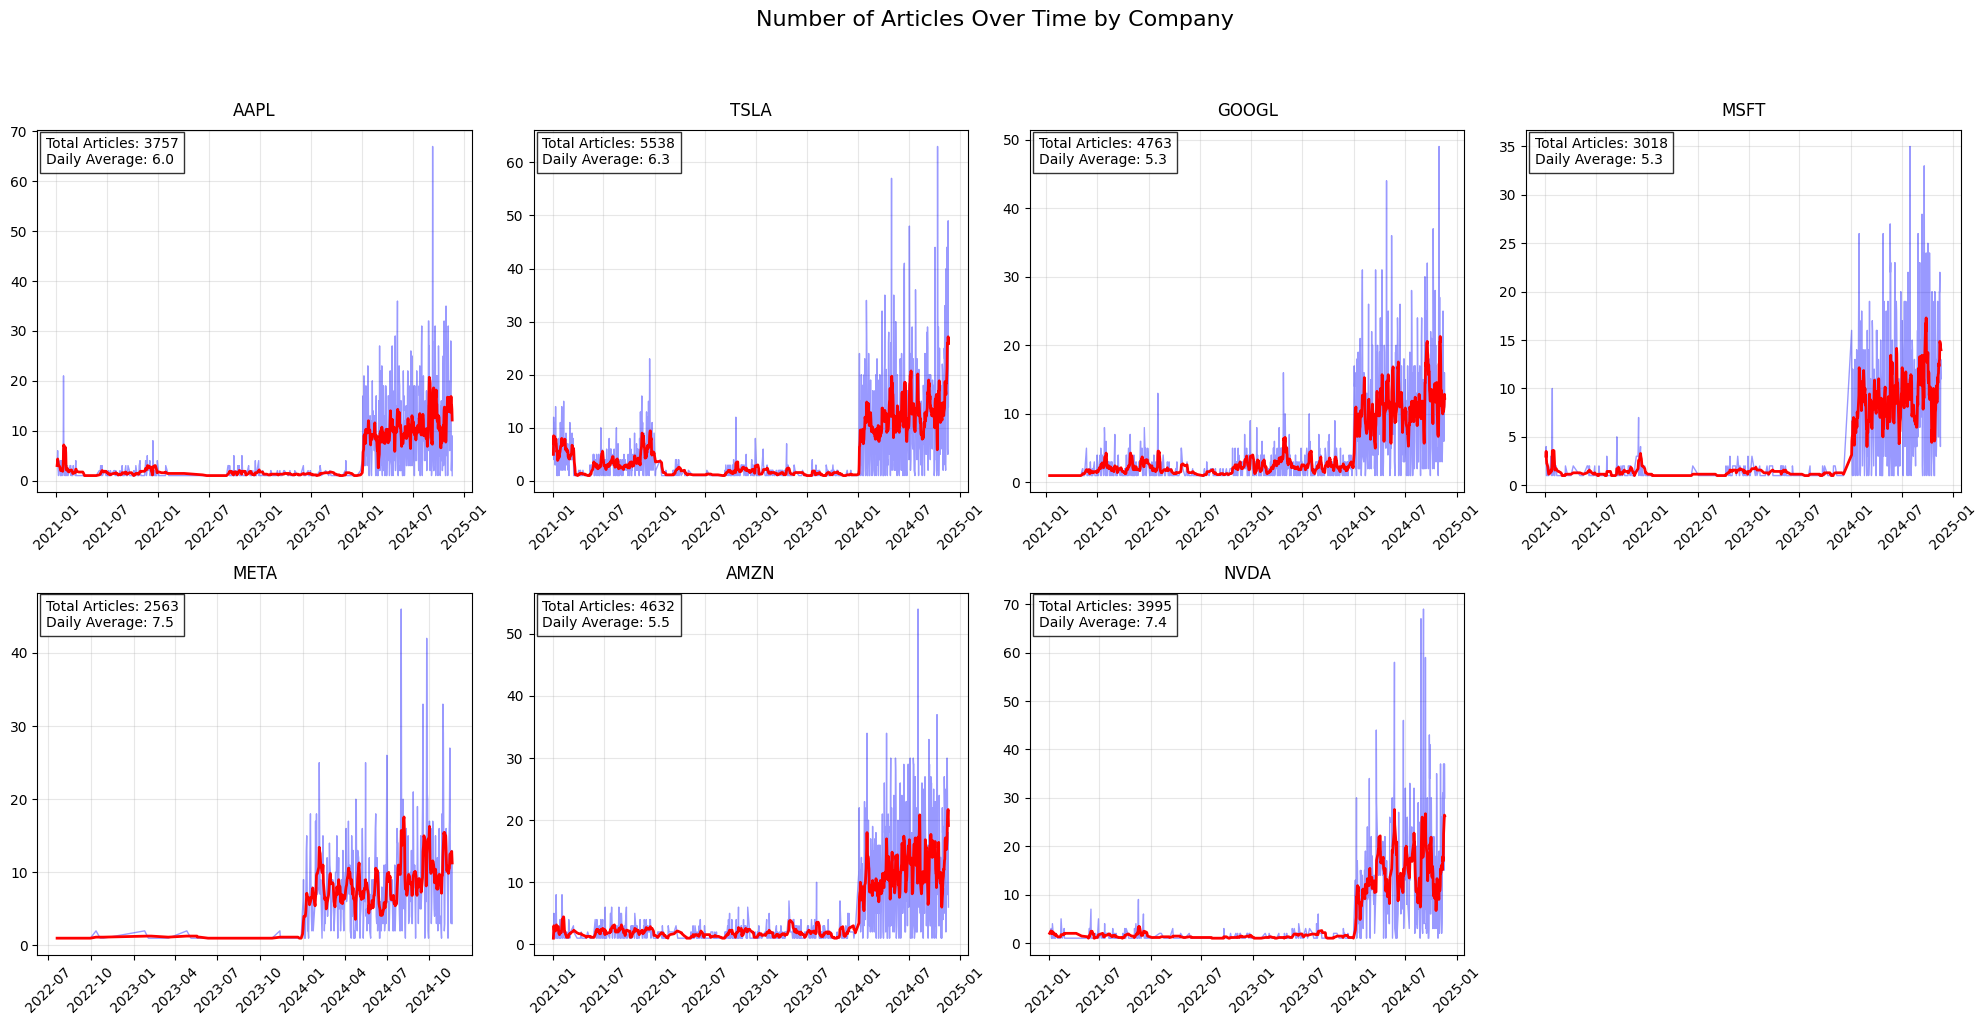


Article Count Summary by Company:

AAPL:
Total articles: 3757
Days with articles: 627
Average articles per day: 5.99

TSLA:
Total articles: 5538
Days with articles: 878
Average articles per day: 6.31

GOOGL:
Total articles: 4763
Days with articles: 907
Average articles per day: 5.25

MSFT:
Total articles: 3018
Days with articles: 573
Average articles per day: 5.27

META:
Total articles: 2563
Days with articles: 341
Average articles per day: 7.52

AMZN:
Total articles: 4632
Days with articles: 847
Average articles per day: 5.47

NVDA:
Total articles: 3995
Days with articles: 538
Average articles per day: 7.43


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Define the companies we want to analyze
companies = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'META', 'AMZN', 'NVDA']


news_df['timestamp'] = pd.to_datetime(news_df['timestamp'])

# Clean up stock symbols and filter for single stock only
news_df['stock'] = news_df['stock'].str.strip("[]'").str.replace("'", "")
news_df = news_df[news_df['stock'].isin(companies)]

# Create subplots for each company (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Add title with padding
fig.suptitle('Number of Articles Over Time by Company', 
             fontsize=16, y=1.02)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot for each company
for idx, company in enumerate(companies):
    company_data = news_df[news_df['stock'] == company].copy()
    
    # Calculate daily article counts
    company_data['Date'] = company_data['timestamp'].dt.date
    daily_counts = company_data.groupby('Date').size().reset_index(name='count')
    
    # Create the plot
    ax = axes[idx]
    
    # Plot daily counts
    ax.plot(daily_counts['Date'], daily_counts['count'], 
            color='blue', alpha=0.4, linewidth=1)
    
    # Add 7-day moving average
    rolling_mean = daily_counts['count'].rolling(window=7, min_periods=1).mean()
    ax.plot(daily_counts['Date'], rolling_mean, 
            color='red', linewidth=2, label='7-day moving average')
    
    # Customize the plot
    ax.set_title(f'{company}', fontsize=12, pad=10)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Add total article count as text
    total_articles = len(company_data)
    daily_avg = total_articles / len(daily_counts)
    ax.text(0.02, 0.98, 
            f'Total Articles: {total_articles}\nDaily Average: {daily_avg:.1f}', 
            transform=ax.transAxes, fontsize=10, 
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Remove the last subplot
axes[-1].remove()

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.9)

plt.savefig('Figures/news_articles_volume_over_time.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nArticle Count Summary by Company:")
print("=" * 80)
for company in companies:
    company_data = news_df[news_df['stock'] == company]
    total_articles = len(company_data)
    days_with_articles = company_data['timestamp'].dt.date.nunique()
    print(f"\n{company}:")
    print(f"Total articles: {total_articles}")
    print(f"Days with articles: {days_with_articles}")
    print(f"Average articles per day: {total_articles/days_with_articles:.2f}")

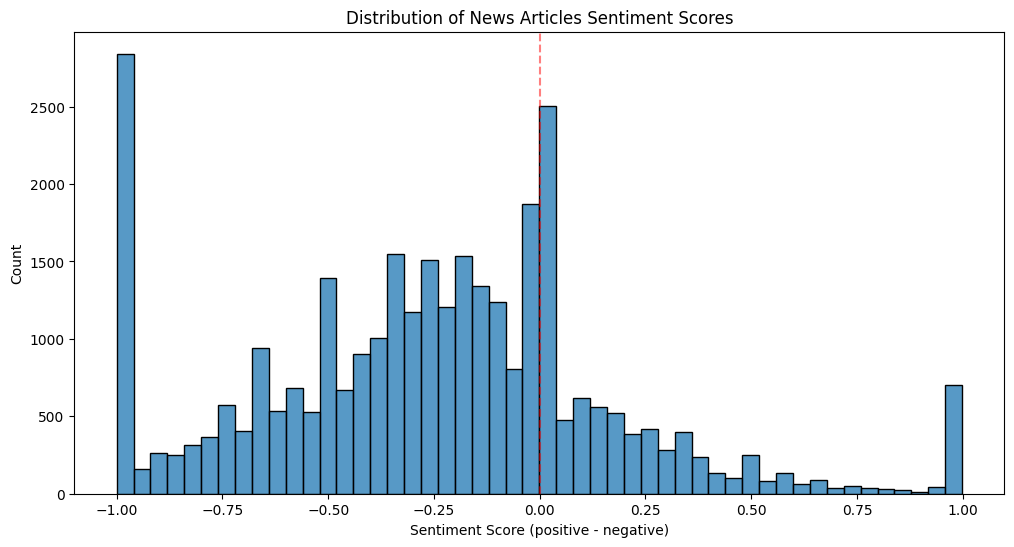


Sentiment Score Summary Statistics:
count    28266.000
mean        -0.261
std          0.430
min         -1.000
25%         -0.526
50%         -0.250
75%         -0.001
max          0.998
Name: sentiment_score, dtype: float64


In [15]:
# Sentiment score distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sentiment_score', bins=50)
plt.title('Distribution of News Articles Sentiment Scores')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Sentiment Score (positive - negative)')
plt.ylabel('Count')
plt.show()

print("\nSentiment Score Summary Statistics:")
print(news_df['sentiment_score'].describe().round(3))


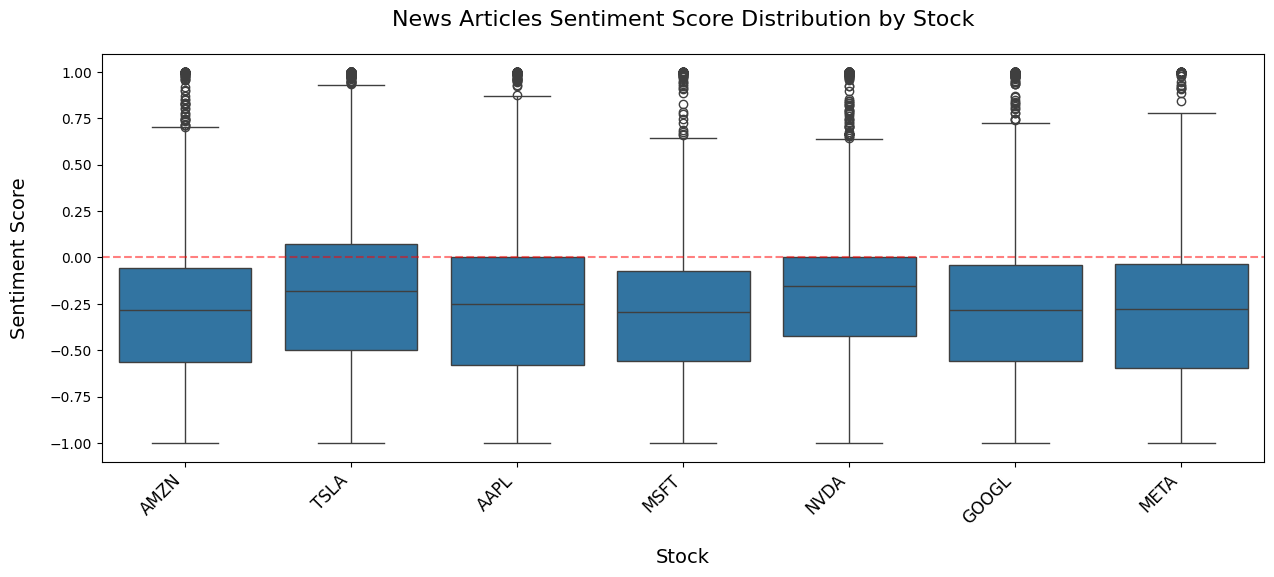

\begin{table}[h!]
\centering
\caption{Stock Sentiment Statistics}
\label{tab:stock_stats}
\begin{tabular}{lrrr}
\hline
Stock & Average Sentiment & Number of Articles & Standard Deviation \\
\hline
TSLA & -0.186 & 5,538 & 0.468 \\
GOOGL & -0.302 & 4,763 & 0.406 \\
AMZN & -0.313 & 4,632 & 0.410 \\
NVDA & -0.179 & 3,995 & 0.426 \\
AAPL & -0.269 & 3,757 & 0.445 \\
MSFT & -0.314 & 3,018 & 0.403 \\
META & -0.306 & 2,563 & 0.397 \\
\hline
\end{tabular}
\end{table}



In [16]:
# Define the companies we want to analyze
companies = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'META', 'AMZN', 'NVDA']

# Clean up stock symbols and filter for single stock only
news_df['stock'] = news_df['stock'].str.strip("[]'").str.replace("'", "")
news_df_single_stock = news_df[news_df['stock'].isin(companies)]

# Create the boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=news_df_single_stock, x='stock', y='sentiment_score')
plt.title('News Articles Sentiment Score Distribution by Stock', fontsize=16, pad=20)
plt.xlabel('Stock', fontsize=14, labelpad=15)
plt.ylabel('Sentiment Score', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Add more padding around the plot
plt.subplots_adjust(bottom=0.2)

plt.show()

def create_stock_stats_table(df, caption="Stock Sentiment Statistics"):
    latex_table = (
        "\\begin{table}[h!]\n"
        "\\centering\n"
        f"\\caption{{{caption}}}\n"
        "\\label{tab:stock_stats}\n"
        "\\begin{tabular}{lrrr}\n"
        "\\hline\n"
        "Stock & Average Sentiment & Number of Articles & Standard Deviation \\\\\n"
        "\\hline\n"
    )
    
    # Sort by number of articles
    df_sorted = df.sort_values('Number of Articles', ascending=False)
    
    # Add each row to the table
    for stock, row in df_sorted.iterrows():
        latex_table += f"{stock} & {row['Average Sentiment']:.3f} & {int(row['Number of Articles']):,d} & {row['Standard Deviation']:.3f} \\\\\n"
    
    latex_table += (
        "\\hline\n"
        "\\end{tabular}\n"
        "\\end{table}\n"
    )
    return latex_table

# Calculate statistics
stock_sentiment = news_df_single_stock.groupby('stock')['sentiment_score'].agg(['mean', 'count', 'std']).round(3)
stock_sentiment = stock_sentiment.rename(columns={
    'mean': 'Average Sentiment',
    'count': 'Number of Articles',
    'std': 'Standard Deviation'
})

# Create and print LaTeX table
latex_table = create_stock_stats_table(stock_sentiment)
print(latex_table)

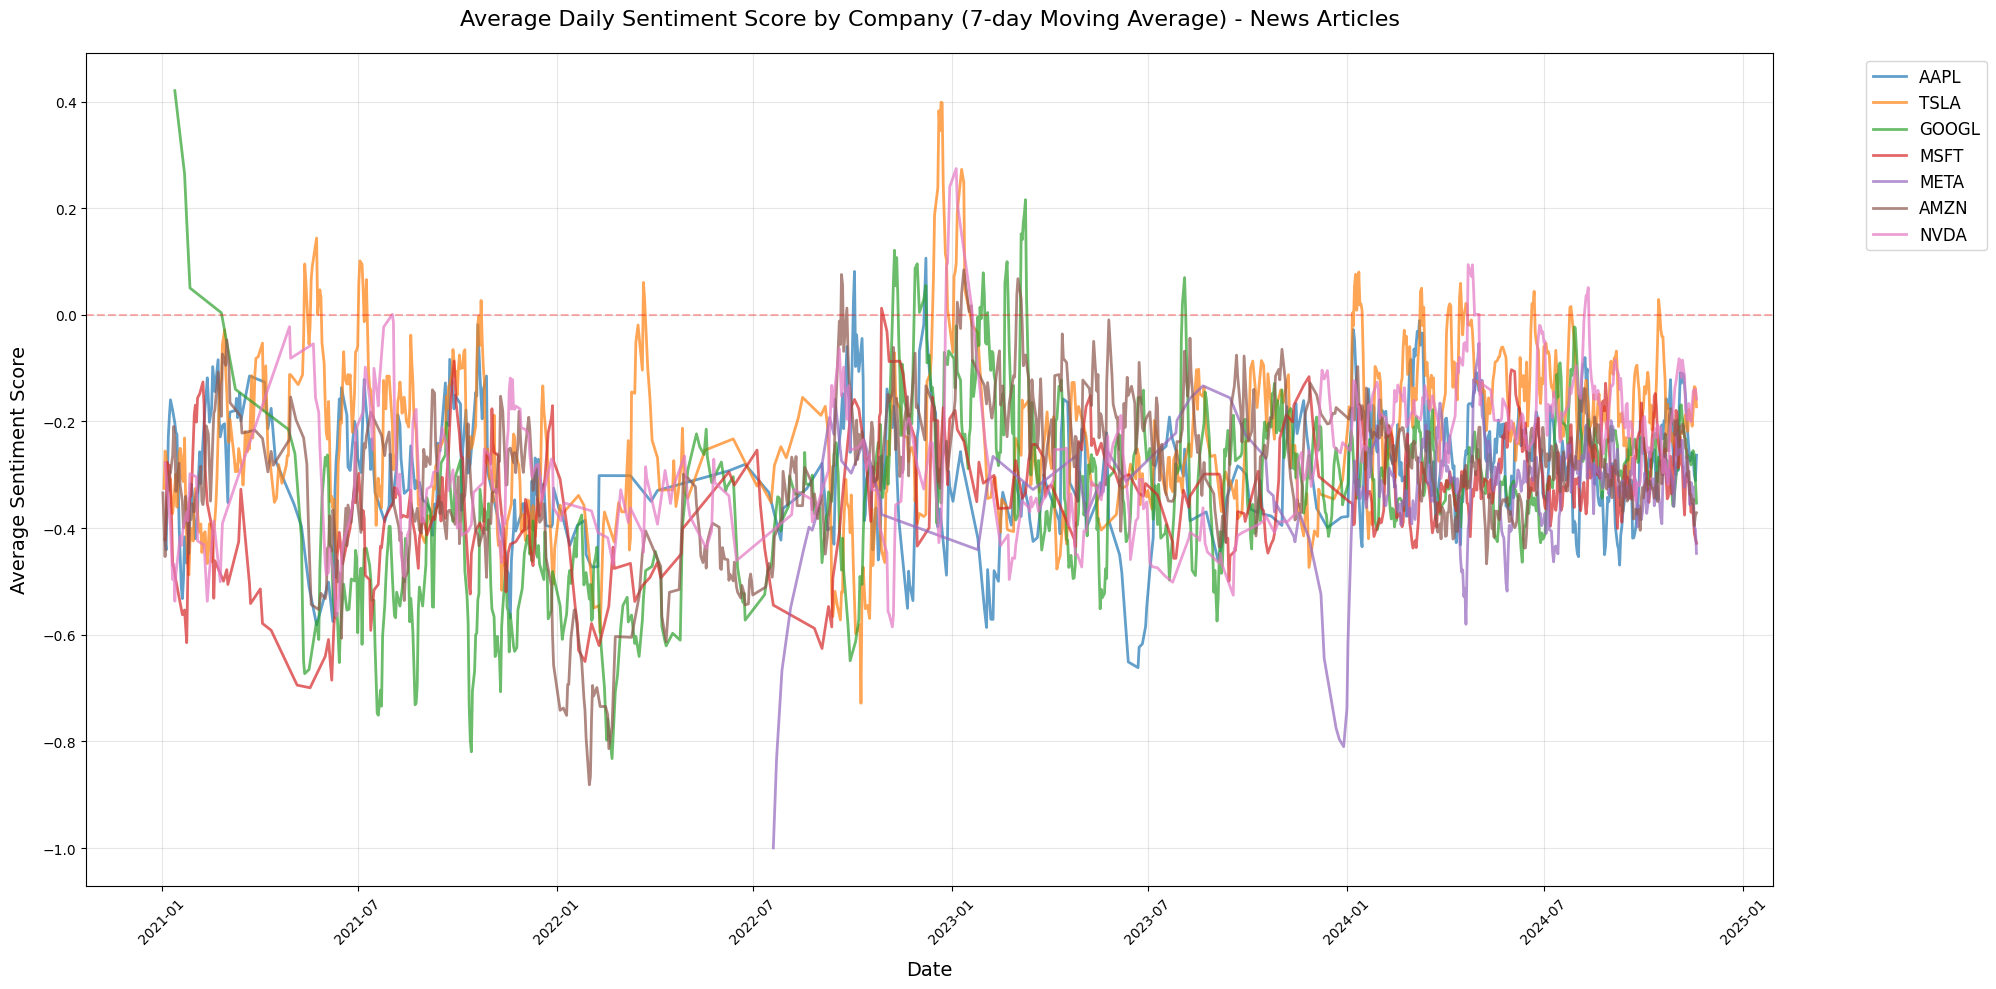


Sentiment Statistics by Company:

AAPL (Total articles: 3757):
count    3757.000
mean       -0.269
std         0.445
min        -1.000
25%        -0.579
50%        -0.248
75%        -0.000
max         0.998
Name: sentiment_score, dtype: float64

TSLA (Total articles: 5538):
count    5538.000
mean       -0.186
std         0.468
min        -1.000
25%        -0.500
50%        -0.181
75%         0.073
max         0.998
Name: sentiment_score, dtype: float64

GOOGL (Total articles: 4763):
count    4763.000
mean       -0.302
std         0.406
min        -1.000
25%        -0.556
50%        -0.286
75%        -0.039
max         0.998
Name: sentiment_score, dtype: float64

MSFT (Total articles: 3018):
count    3018.000
mean       -0.314
std         0.403
min        -1.000
25%        -0.558
50%        -0.293
75%        -0.071
max         0.998
Name: sentiment_score, dtype: float64

META (Total articles: 2563):
count    2563.000
mean       -0.306
std         0.397
min        -1.000
25%        -0.5

In [17]:
# Define companies to track
companies = ['AAPL', 'TSLA', 'GOOGL', 'MSFT', 'META', 'AMZN', 'NVDA']

# Create separate dataframes for each company
company_dfs = {}
for company in companies:
    # Filter for rows where the company is mentioned (using string contains)
    company_dfs[company] = news_df[news_df['stock'].str.contains(company, na=False)].copy()
    company_dfs[company]['Date'] = pd.to_datetime(company_dfs[company]['timestamp']).dt.date

# Plot sentiment over time for each company
plt.figure(figsize=(20, 10))

# Plot each company's sentiment
for company in companies:
    daily_sentiment = company_dfs[company].groupby('Date')['sentiment_score'].mean()
    # Resample to smooth the lines (7-day moving average)
    daily_sentiment = daily_sentiment.rolling(window=7, min_periods=1).mean()
    plt.plot(daily_sentiment.index, daily_sentiment.values, label=company, linewidth=2, alpha=0.7)

plt.title('Average Daily Sentiment Score by Company (7-day Moving Average) - News Articles', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Average Sentiment Score', fontsize=14, labelpad=10)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print statistics for each company
print("\nSentiment Statistics by Company:")
print("=" * 80)
for company in companies:
    stats = company_dfs[company]['sentiment_score'].describe().round(3)
    count = len(company_dfs[company])
    print(f"\n{company} (Total articles: {count}):")
    print(stats)

<Figure size 2000x1000 with 0 Axes>

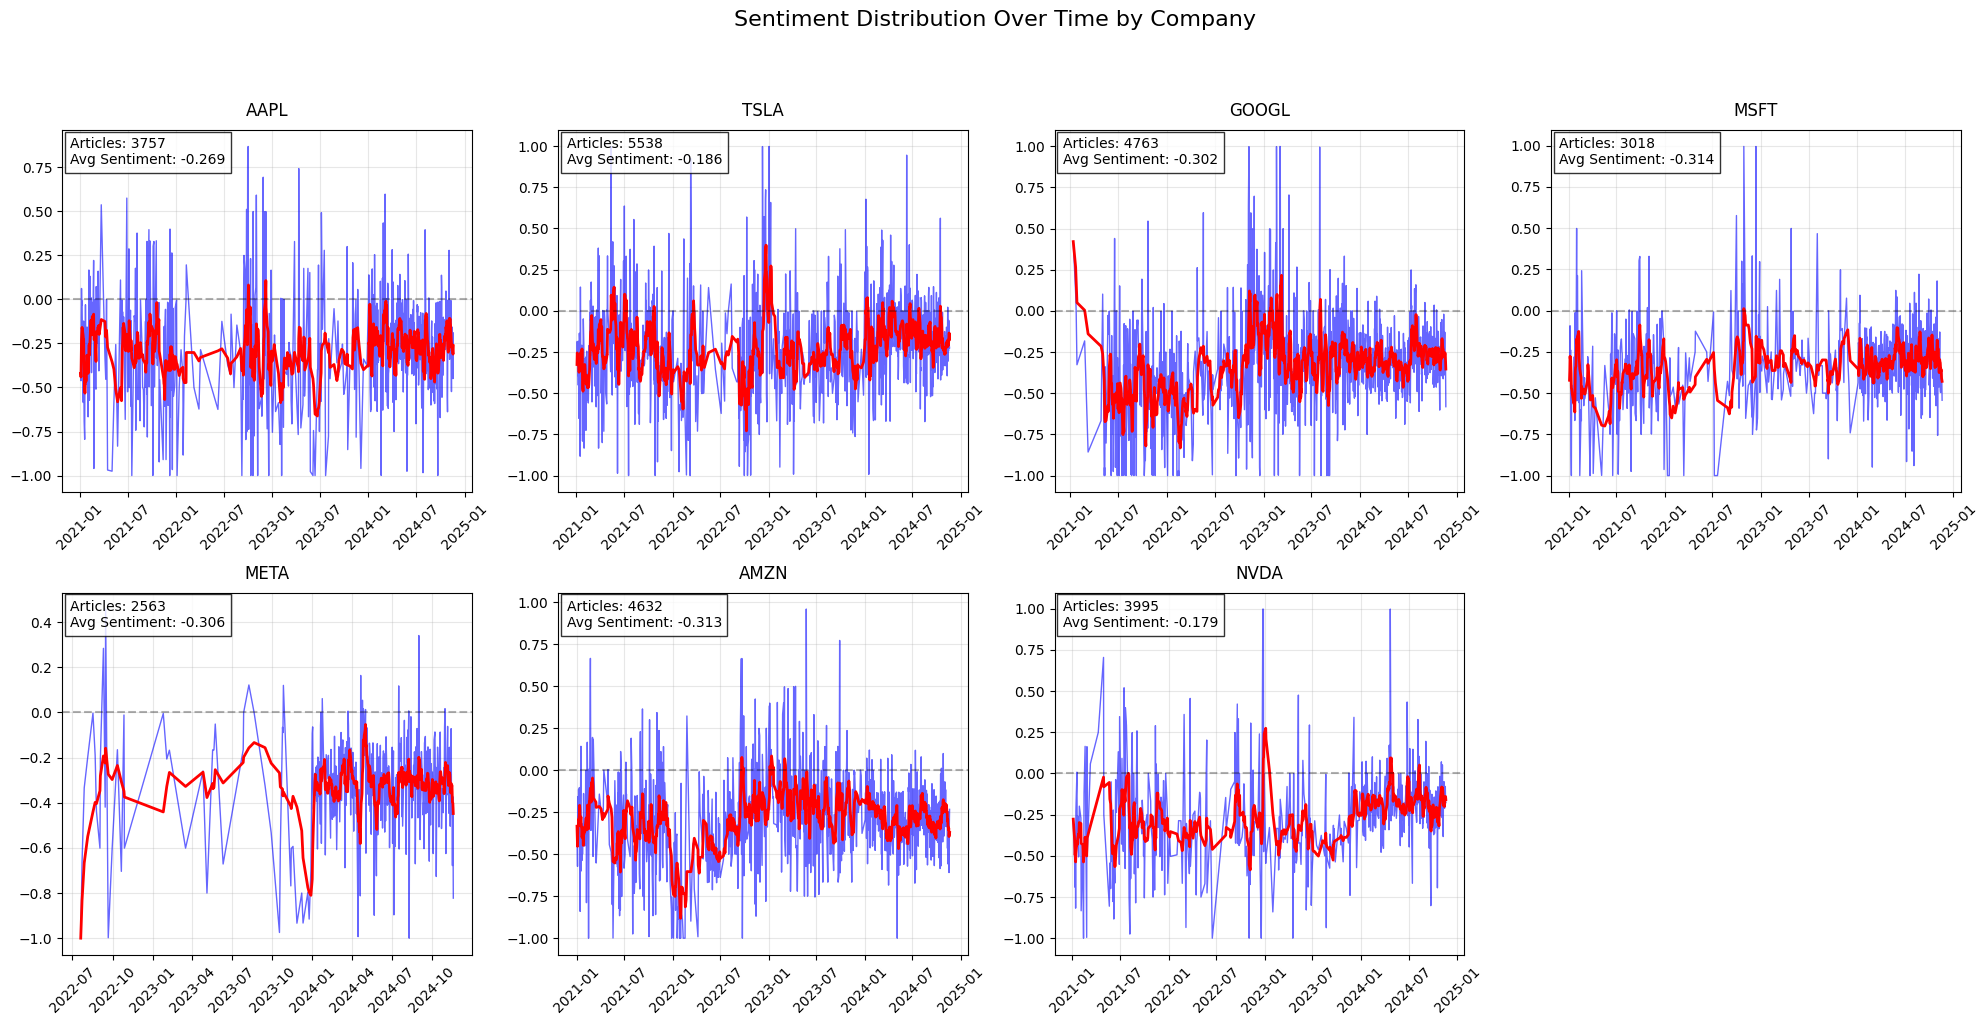


Summary Statistics by Company:

AAPL:
Total articles: 3757
count    3757.000
mean       -0.269
std         0.445
min        -1.000
25%        -0.579
50%        -0.248
75%        -0.000
max         0.998
Name: sentiment_score, dtype: float64

TSLA:
Total articles: 5538
count    5538.000
mean       -0.186
std         0.468
min        -1.000
25%        -0.500
50%        -0.181
75%         0.073
max         0.998
Name: sentiment_score, dtype: float64

GOOGL:
Total articles: 4763
count    4763.000
mean       -0.302
std         0.406
min        -1.000
25%        -0.556
50%        -0.286
75%        -0.039
max         0.998
Name: sentiment_score, dtype: float64

MSFT:
Total articles: 3018
count    3018.000
mean       -0.314
std         0.403
min        -1.000
25%        -0.558
50%        -0.293
75%        -0.071
max         0.998
Name: sentiment_score, dtype: float64

META:
Total articles: 2563
count    2563.000
mean       -0.306
std         0.397
min        -1.000
25%        -0.596
50%      

In [18]:
# Time series plot for each company
plt.figure(figsize=(20, 10))

# Create subplots for each company (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Add title with padding
fig.suptitle('Sentiment Distribution Over Time by Company', 
             fontsize=16, y=1.02)  # Moved title up

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot for each company
for idx, company in enumerate(companies):
    company_data = news_df[news_df['stock'] == company].copy()
    
    # Calculate daily average sentiment
    company_data['Date'] = company_data['timestamp'].dt.date
    daily_sentiment = company_data.groupby('Date')['sentiment_score'].agg(['mean', 'count']).reset_index()
    
    # Create the plot
    ax = axes[idx]
    
    # Plot sentiment scores
    ax.plot(daily_sentiment['Date'], daily_sentiment['mean'], 
            color='blue', alpha=0.6, linewidth=1)
    
    # Add 7-day moving average
    rolling_mean = daily_sentiment['mean'].rolling(window=7, min_periods=1).mean()
    ax.plot(daily_sentiment['Date'], rolling_mean, 
            color='red', linewidth=2, label='7-day moving average')
    
    # Customize the plot
    ax.set_title(f'{company}', fontsize=12, pad=10)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Add article count as text
    total_articles = len(company_data)
    avg_sentiment = company_data['sentiment_score'].mean()
    ax.text(0.02, 0.98, f'Articles: {total_articles}\nAvg Sentiment: {avg_sentiment:.3f}', 
            transform=ax.transAxes, fontsize=10, 
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Remove the last subplot (since we have 7 companies and 8 spots)
axes[-1].remove()

# Adjust layout with extra space for title
plt.tight_layout()
fig.subplots_adjust(top=0.9)  # Make room for title

# savefig
plt.savefig('Figures/sentiment_over_time.jpg', dpi=300, bbox_inches='tight')

plt.show()

# Print summary statistics
print("\nSummary Statistics by Company:")
print("=" * 80)
for company in companies:
    company_data = news_df[news_df['stock'] == company]
    stats = company_data['sentiment_score'].describe().round(3)
    print(f"\n{company}:")
    print(f"Total articles: {len(company_data)}")
    print(stats)

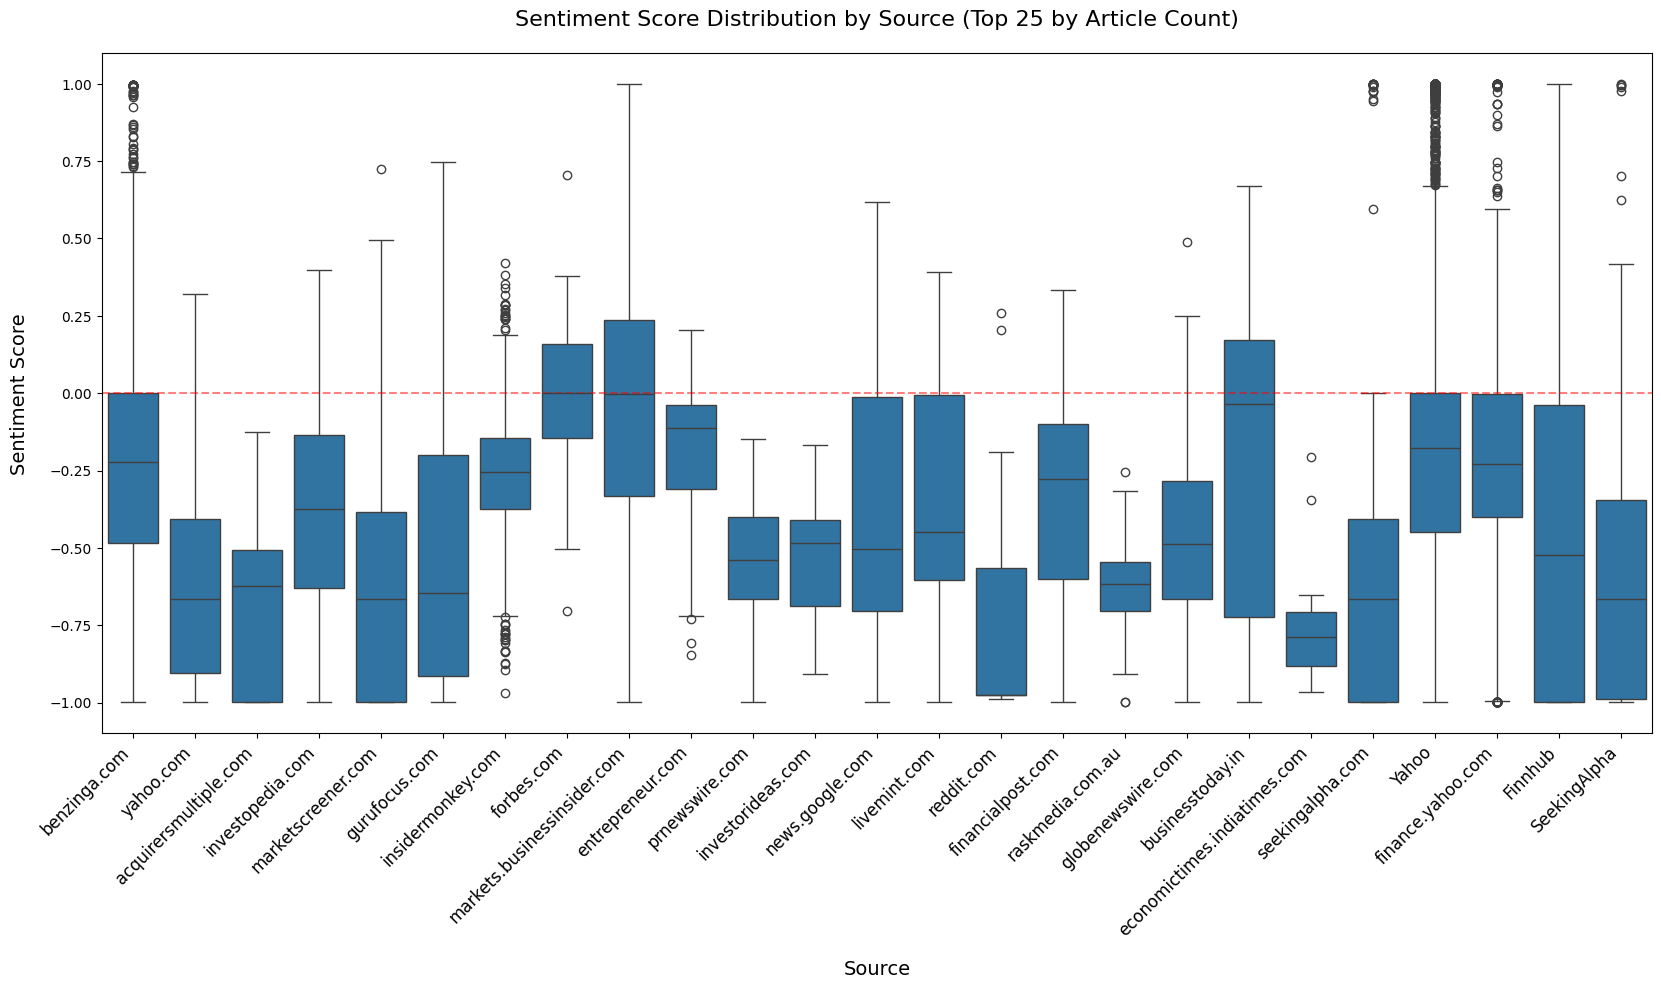



Source Statistics for Top 25 Sources (sorted by average sentiment):


                              Average Sentiment  Number of Articles  Standard Deviation
Source                                                                                 
Yahoo                                    -0.197               15100               0.418
benzinga.com                             -0.207                3803               0.384
Finnhub                                  -0.462                3058               0.524
insidermonkey.com                        -0.259                1735               0.188
finance.yahoo.com                        -0.198                1478               0.386
gurufocus.com                            -0.546                 644               0.411
SeekingAlpha                             -0.597                 415               0.383
markets.businessinsider.com              -0.086                 268               0.432
marketscreener.com                       -0.598 

In [27]:
# Get top 100 sources by count
top_sources = news_df['Source'].value_counts().nlargest(25).index
news_df_top_sources = news_df[news_df['Source'].isin(top_sources)]

# Source analysis with improved spacing and readability
plt.figure(figsize=(20, 10))  # Wider figure

# Create boxplot with increased spacing
ax = sns.boxplot(data=news_df_top_sources, x='Source', y='sentiment_score')

# Customize the plot
plt.title('Sentiment Score Distribution by Source (Top 25 by Article Count)', fontsize=16, pad=20)
plt.xlabel('Source', fontsize=14, labelpad=15)
plt.ylabel('Sentiment Score', fontsize=14, labelpad=15)

# Rotate x-axis labels and adjust their position with more spacing
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Add more padding around the plot
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

# Show plot
plt.show()

# Print source statistics with better formatting and spacing
source_sentiment = news_df_top_sources.groupby('Source')['sentiment_score'].agg(['mean', 'count', 'std']).round(3)
source_sentiment = source_sentiment.rename(columns={
    'mean': 'Average Sentiment',
    'count': 'Number of Articles',
    'std': 'Standard Deviation'
})

print("\n")  # Extra spacing
print("Source Statistics for Top 25 Sources (sorted by average sentiment):")
print("=" * 100)  # Longer separator
print("\n")  # Extra spacing
print(source_sentiment.sort_values('Number of Articles', ascending=False)  # Sort by count instead of sentiment
      .to_string(float_format=lambda x: '{:>10.3f}'.format(x)))  # Right-aligned numbers
print("\n")  # Extra spacing

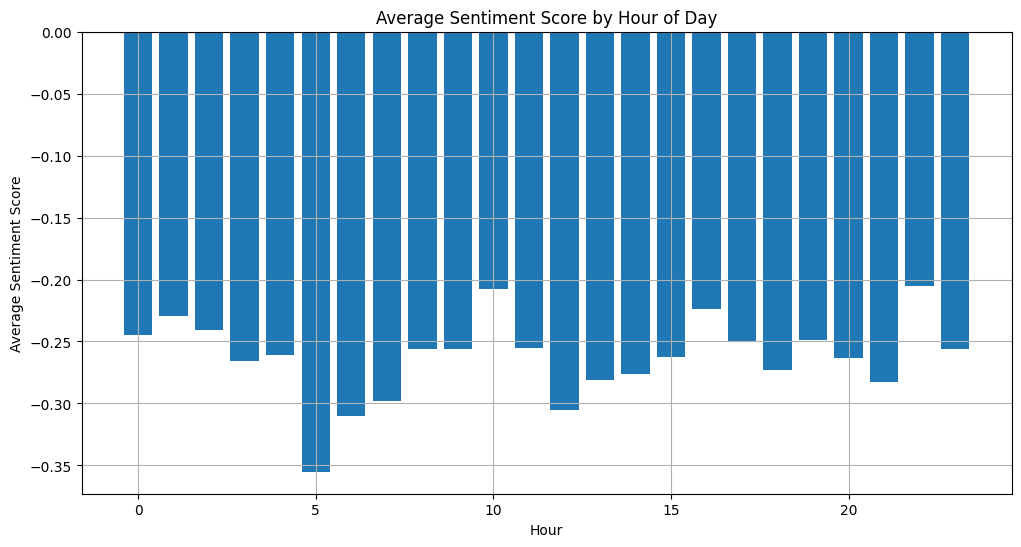


Hourly Statistics:
          mean  count
Hour                 
22   -0.205585   1287
10   -0.207746   1254
16   -0.224079   1995
1    -0.229541    445
2    -0.240942    452
0    -0.244899    562
19   -0.248416   1402
17   -0.249788   1713
11   -0.255196   1883
8    -0.255819    687
9    -0.256038    896
23   -0.256418   1016
4    -0.260972    382
15   -0.262757   2277
20   -0.263031   1228
3    -0.265804    368
18   -0.273096   1526
14   -0.276575   2288
13   -0.281240   2036
21   -0.283084   1150
7    -0.298207    601
12   -0.305555   1836
6    -0.310397    517
5    -0.355103    465


In [28]:
# Time of day analysis
news_df['Hour'] = news_df['timestamp'].dt.hour
hourly_sentiment = news_df.groupby('Hour')['sentiment_score'].agg(['mean', 'count'])

plt.figure(figsize=(12, 6))
plt.bar(hourly_sentiment.index, hourly_sentiment['mean'])
plt.title('Average Sentiment Score by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

print("\nHourly Statistics:")
print(hourly_sentiment.sort_values('mean', ascending=False))

## **Sentiment Analysis: Reddit**

In [29]:
import pandas as pd

reddit_df = pd.read_csv(r'C:\Users\jbhan\Desktop\StockMarketNewsImpact\Reddit_2021_to_2024_with_sentiment.csv')

reddit_df.head()

,stock,timestamp,title,body,source,full_text,sentiment_label,sentiment_score,positive_score,negative_score,neutral_score
0,Apple,2023-06-08 19:18:52,📣 Apollo will close down on June 30th. Reddit’...,['I want to thank you for making honestly the ...,reddit,📣 Apollo will close down on June 30th. Reddit’...,negative,-0.100901,0.216493,0.317394,0.466112
1,Apple,2022-02-21 12:12:27,"Thanks, Apple. I’ll let her know.",['--- \n>This is a friendly reminder to [...,reddit,"Thanks, Apple. I’ll let her know. ['--- ...",negative,-0.365893,0.124385,0.490278,0.385337
2,Apple,2023-06-19 19:23:42,"📣 I want to debunk Reddit's claims, and talk a...",['after seeing u/spez in that ama thread i’m n...,reddit,"📣 I want to debunk Reddit's claims, and talk a...",negative,-0.250817,0.188389,0.439206,0.372405
3,Apple,2024-10-29 12:41:35,A tram just derailed and crashed into an Apple...,"['now apple needs to install windows', ""What's...",reddit,A tram just derailed and crashed into an Apple...,negative,-0.554540,0.022762,0.577302,0.399936
4,Apple,2022-03-30 21:31:44,Computer repair shop owner and YouTuber Louis ...,['Always good to see Louis getting positive pr...,reddit,Computer repair shop owner and YouTuber Louis ...,neutral,-0.009387,0.377492,0.386879,0.235630


In [30]:
# how many posts per company?
print("\nPosts per Company (Reddit):")
reddit_df['stock'].value_counts()


Posts per Company (Reddit):


stock
Microsoft    1601
Nvidia       1428
Apple        1400
Tesla        1265
Amazon       1104
Meta         1047
Google        897
Name: count, dtype: int64

In [31]:
print("\nSentiment Score Summary Statistics (Reddit):")
print(reddit_df['sentiment_score'].describe().round(3))


Sentiment Score Summary Statistics (Reddit):
count    8742.000
mean       -0.161
std         0.374
min        -0.935
25%        -0.438
50%        -0.197
75%         0.083
max         0.979
Name: sentiment_score, dtype: float64


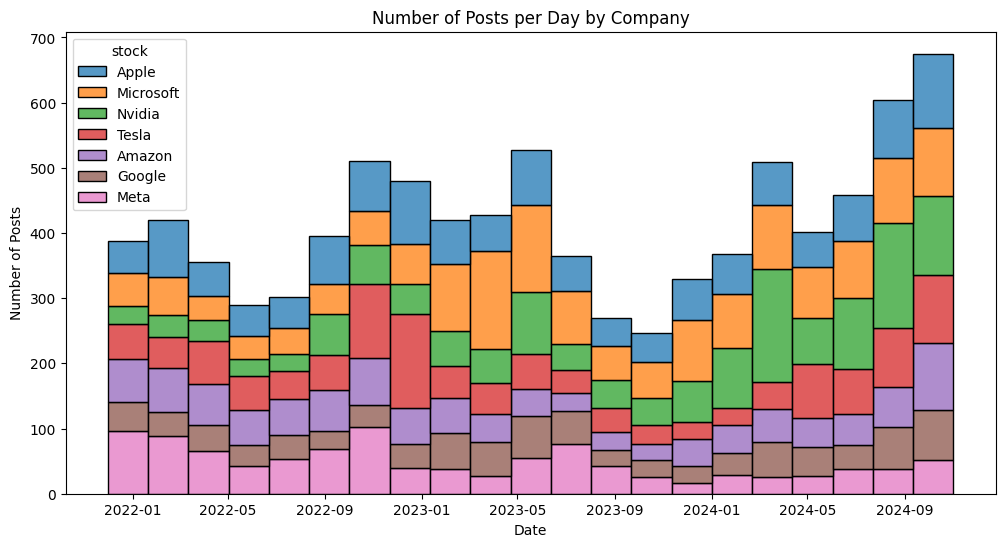

In [32]:
# distribution of time, use timestamp column
reddit_df['timestamp'] = pd.to_datetime(reddit_df['timestamp'])
reddit_df['timestamp'].value_counts()

# plot over time
plt.figure(figsize=(12, 6))
sns.histplot(data=reddit_df, x='timestamp', hue='stock', multiple='stack')
plt.title('Number of Posts per Day by Company')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()



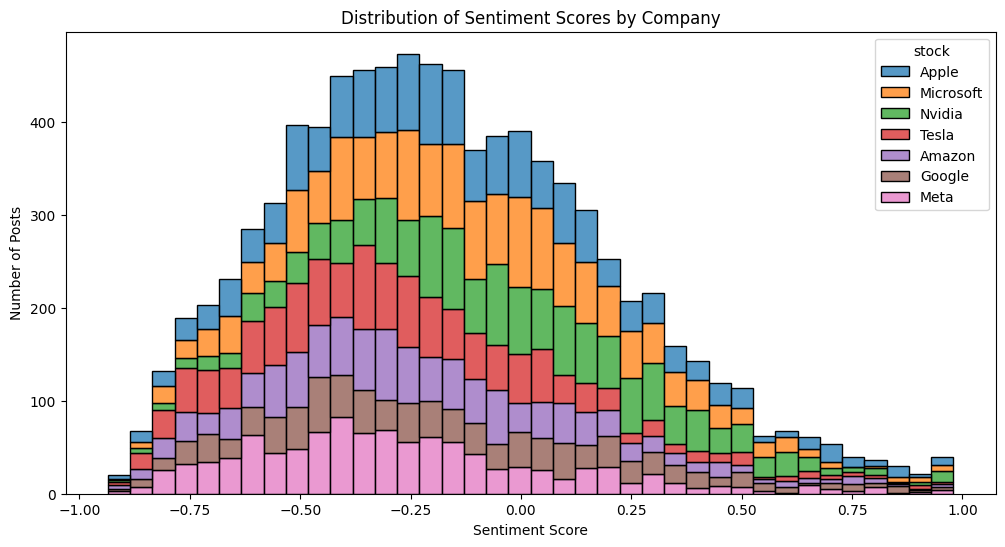

In [33]:
# Distribution of sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(data=reddit_df, x='sentiment_score', hue='stock', multiple='stack')
plt.title('Distribution of Sentiment Scores by Company')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Posts')
plt.show()


In [34]:
print("\nMean Sentiment Score by Company (Reddit):")
# Mean sentiment score by company
reddit_df.groupby('stock')['sentiment_score'].mean()




Mean Sentiment Score by Company (Reddit):


stock
Amazon      -0.215115
Apple       -0.130485
Google      -0.164840
Meta        -0.265674
Microsoft   -0.117594
Nvidia      -0.023503
Tesla       -0.266876
Name: sentiment_score, dtype: float64

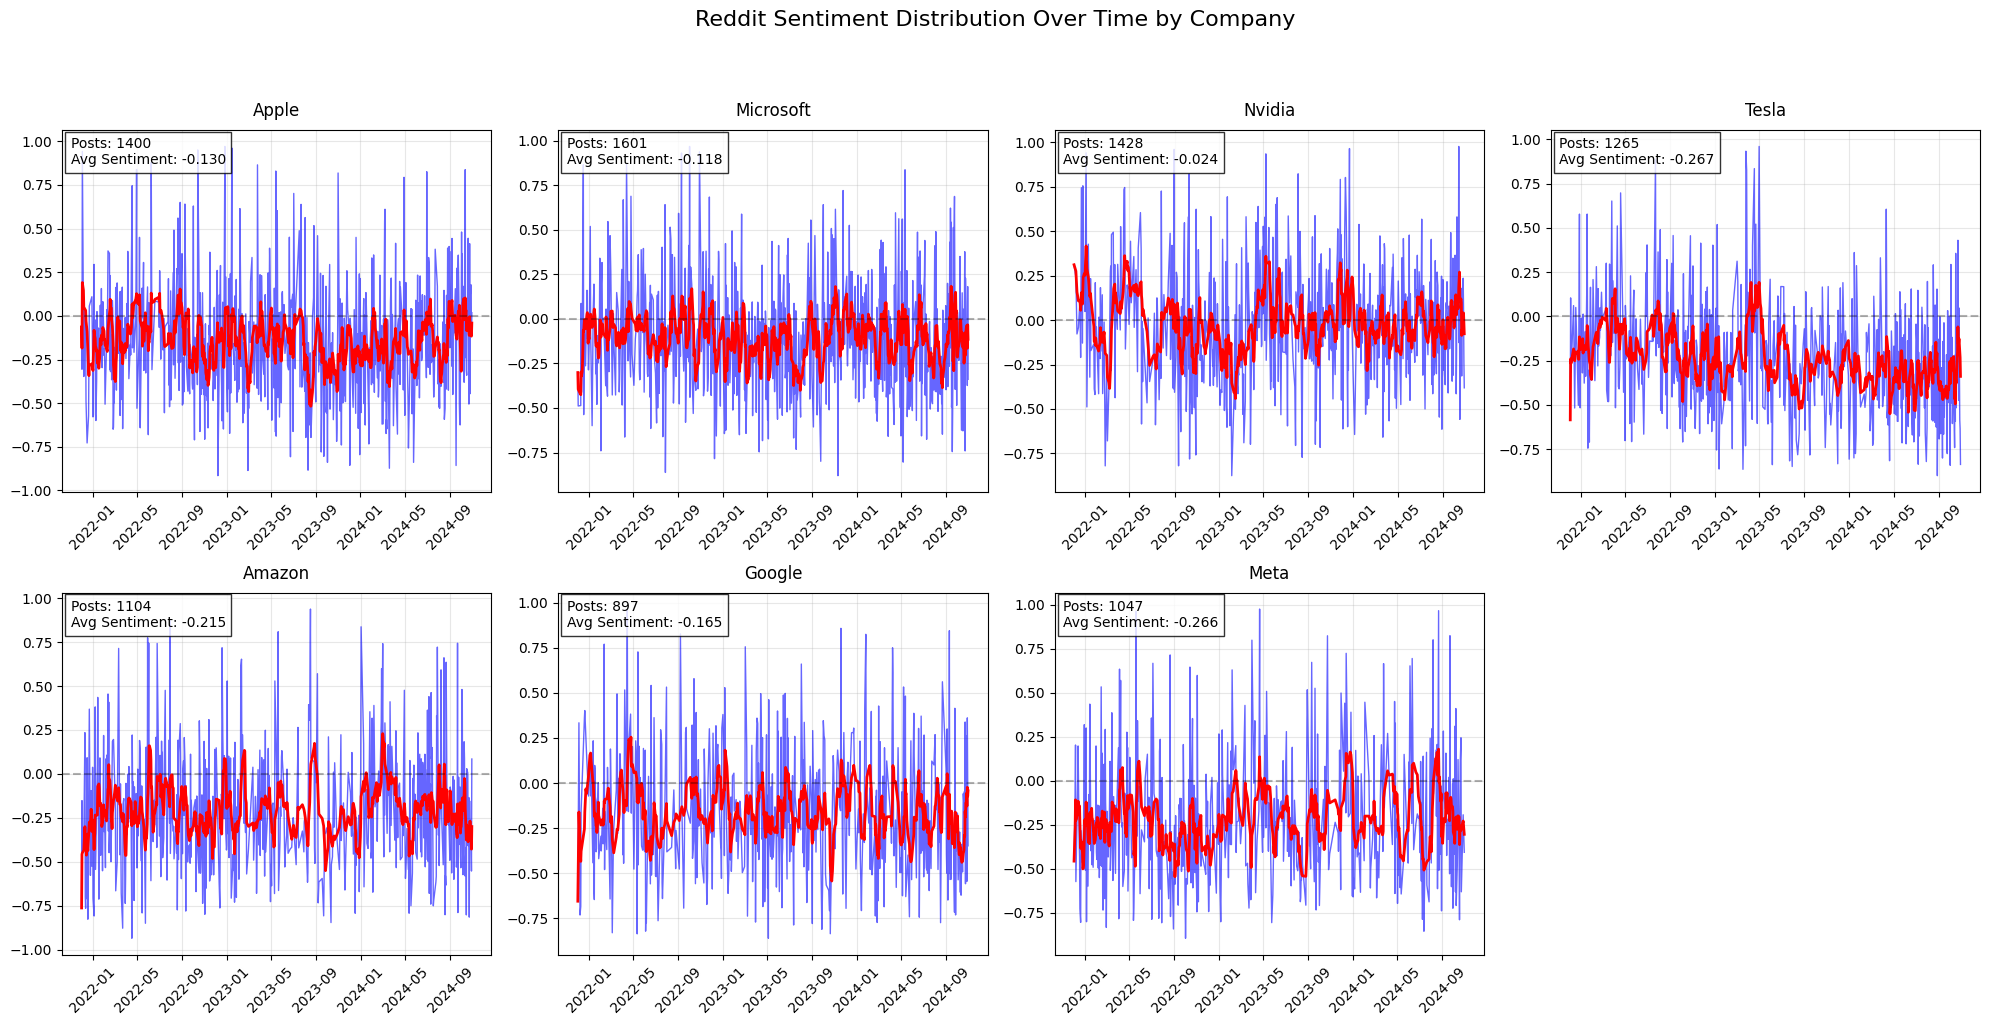


Summary Statistics by Company:

Apple:
Total posts: 1400
count    1400.000
mean       -0.130
std         0.384
min        -0.915
25%        -0.402
50%        -0.170
75%         0.098
max         0.971
Name: sentiment_score, dtype: float64

Microsoft:
Total posts: 1601
count    1601.000
mean       -0.118
std         0.352
min        -0.903
25%        -0.382
50%        -0.131
75%         0.113
max         0.977
Name: sentiment_score, dtype: float64

Nvidia:
Total posts: 1428
count    1428.000
mean       -0.024
std         0.361
min        -0.905
25%        -0.277
50%        -0.038
75%         0.231
max         0.977
Name: sentiment_score, dtype: float64

Tesla:
Total posts: 1265
count    1265.000
mean       -0.267
std         0.353
min        -0.900
25%        -0.524
50%        -0.308
75%        -0.043
max         0.959
Name: sentiment_score, dtype: float64

Amazon:
Total posts: 1104
count    1104.000
mean       -0.215
std         0.362
min        -0.935
25%        -0.481
50%        -0.

In [22]:
def plot_reddit_sentiment_over_time(reddit_df):
    """Create time series plots of Reddit sentiment for each company"""
    
    companies = ['Apple', 'Microsoft', 'Nvidia', 'Tesla', 'Amazon', 'Google', 'Meta']
    
    # Create subplots for each company (2 rows, 4 columns)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    # Add title with padding
    fig.suptitle('Reddit Sentiment Distribution Over Time by Company', 
                 fontsize=16, y=1.02)
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # Plot for each company
    for idx, company in enumerate(companies):
        company_data = reddit_df[reddit_df['stock'] == company].copy()
        
        # Calculate daily average sentiment
        company_data['Date'] = company_data['timestamp'].dt.date
        daily_sentiment = company_data.groupby('Date')['sentiment_score'].agg(['mean', 'count']).reset_index()
        
        # Create the plot
        ax = axes[idx]
        
        # Plot sentiment scores
        ax.plot(daily_sentiment['Date'], daily_sentiment['mean'], 
                color='blue', alpha=0.6, linewidth=1)
        
        # Add 7-day moving average
        rolling_mean = daily_sentiment['mean'].rolling(window=7, min_periods=1).mean()
        ax.plot(daily_sentiment['Date'], rolling_mean, 
                color='red', linewidth=2, label='7-day moving average')
        
        # Customize the plot
        ax.set_title(f'{company}', fontsize=12, pad=10)
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        
        # Add post count as text
        total_posts = len(company_data)
        avg_sentiment = company_data['sentiment_score'].mean()
        ax.text(0.02, 0.98, f'Posts: {total_posts}\nAvg Sentiment: {avg_sentiment:.3f}', 
                transform=ax.transAxes, fontsize=10, 
                verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    
    # Remove the last subplot
    axes[-1].remove()
    
    # Adjust layout with extra space for title
    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    
    # Save figure
    plt.savefig('Figures/reddit_sentiment_over_time.jpg', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics by Company:")
    print("=" * 80)
    for company in companies:
        company_data = reddit_df[reddit_df['stock'] == company]
        stats = company_data['sentiment_score'].describe().round(3)
        print(f"\n{company}:")
        print(f"Total posts: {len(company_data)}")
        print(stats)

# Add to your main function:
if __name__ == "__main__":    
    # Load Reddit data for time series plots
    reddit_df = pd.read_csv(r"C:\Users\jbhan\Desktop\StockMarketNewsImpact\MarketNews\data\final\Reddit_2021_to_2024_with_sentiment.csv")
    reddit_df['timestamp'] = pd.to_datetime(reddit_df['timestamp'])
    
    # Create sentiment over time plots
    plot_reddit_sentiment_over_time(reddit_df)

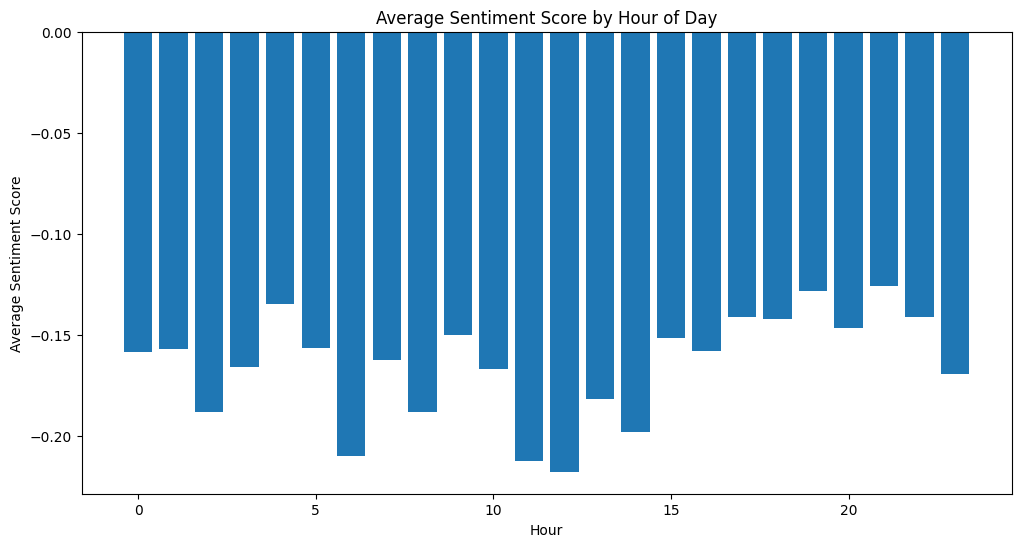

In [36]:
# Average sentiment score by hour of day
reddit_df['hour'] = pd.to_datetime(reddit_df['timestamp']).dt.hour
hourly_sentiment = reddit_df.groupby('hour')['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
plt.bar(hourly_sentiment.index, hourly_sentiment.values)
plt.title('Average Sentiment Score by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Sentiment Score')
plt.show()


## **Report Figures**

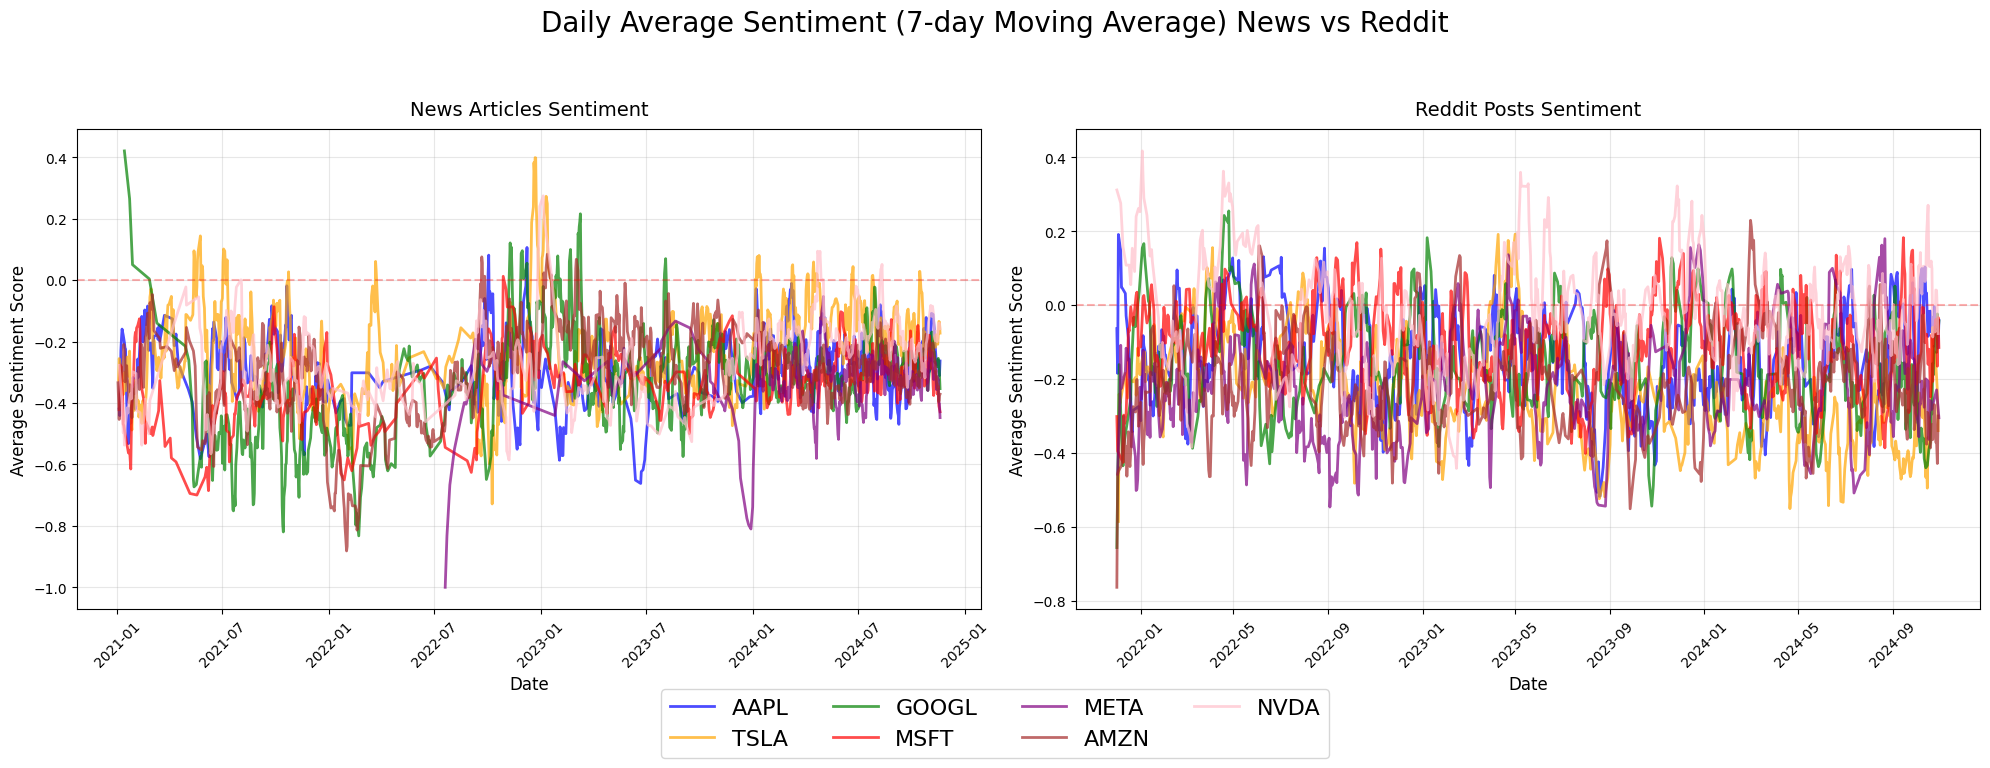

In [85]:
# Preprocess reddit_df['stock'] to match company_colors keys
reddit_df['stock'] = reddit_df['stock'].replace({
    'Apple': 'AAPL',
    'Tesla': 'TSLA',
    'Google': 'GOOGL',
    'Microsoft': 'MSFT',
    'Meta': 'META',
    'Amazon': 'AMZN',
    'Nvidia': 'NVDA'
})

# Create figure with 1x2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Store line objects for combined legend
lines = []
labels = []

# Define consistent colors for companies
company_colors = {
    'AAPL': 'blue',
    'TSLA': 'orange',
    'GOOGL': 'green',
    'MSFT': 'red',
    'META': 'purple',
    'AMZN': 'brown',
    'NVDA': 'pink'
}

# Plot 1: News Sentiment
for company in company_colors.keys():
    company_data = news_df[news_df['stock'].str.contains(company, na=False)].copy()
    company_data['Date'] = pd.to_datetime(company_data['timestamp']).dt.date
    
    daily_sentiment = company_data.groupby('Date')['sentiment_score'].mean()
    daily_sentiment = daily_sentiment.rolling(window=7, min_periods=1).mean()
    line = ax1.plot(
        daily_sentiment.index, 
        daily_sentiment.values, 
        color=company_colors[company], 
        linewidth=2, 
        alpha=0.7
    )
    
    if company not in labels:
        lines.append(line[0])
        labels.append(company)

ax1.set_title('News Articles Sentiment', fontsize=14, pad=10)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Average Sentiment Score', fontsize=12)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Reddit Sentiment
for company in company_colors.keys():
    company_data = reddit_df[reddit_df['stock'] == company].copy()
    company_data['date'] = pd.to_datetime(company_data['timestamp']).dt.date
    
    daily_sentiment = company_data.groupby('date')['sentiment_score'].mean()
    daily_sentiment = daily_sentiment.rolling(window=7, min_periods=1).mean()
    line = ax2.plot(
        daily_sentiment.index, 
        daily_sentiment.values, 
        color=company_colors[company], 
        linewidth=2, 
        alpha=0.7
    )
    
    if company not in labels:
        lines.append(line[0])
        labels.append(company)

ax2.set_title('Reddit Posts Sentiment', fontsize=14, pad=10)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Average Sentiment Score', fontsize=12)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Add single legend below the plots
fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, 0), fontsize=16, ncol=4)

# Add overall title
fig.suptitle('Daily Average Sentiment (7-day Moving Average) News vs Reddit', fontsize=20, y=0.95)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.8, bottom=0.2)

plt.savefig('Figures/average_sentiment_over_time.jpg')
plt.show()


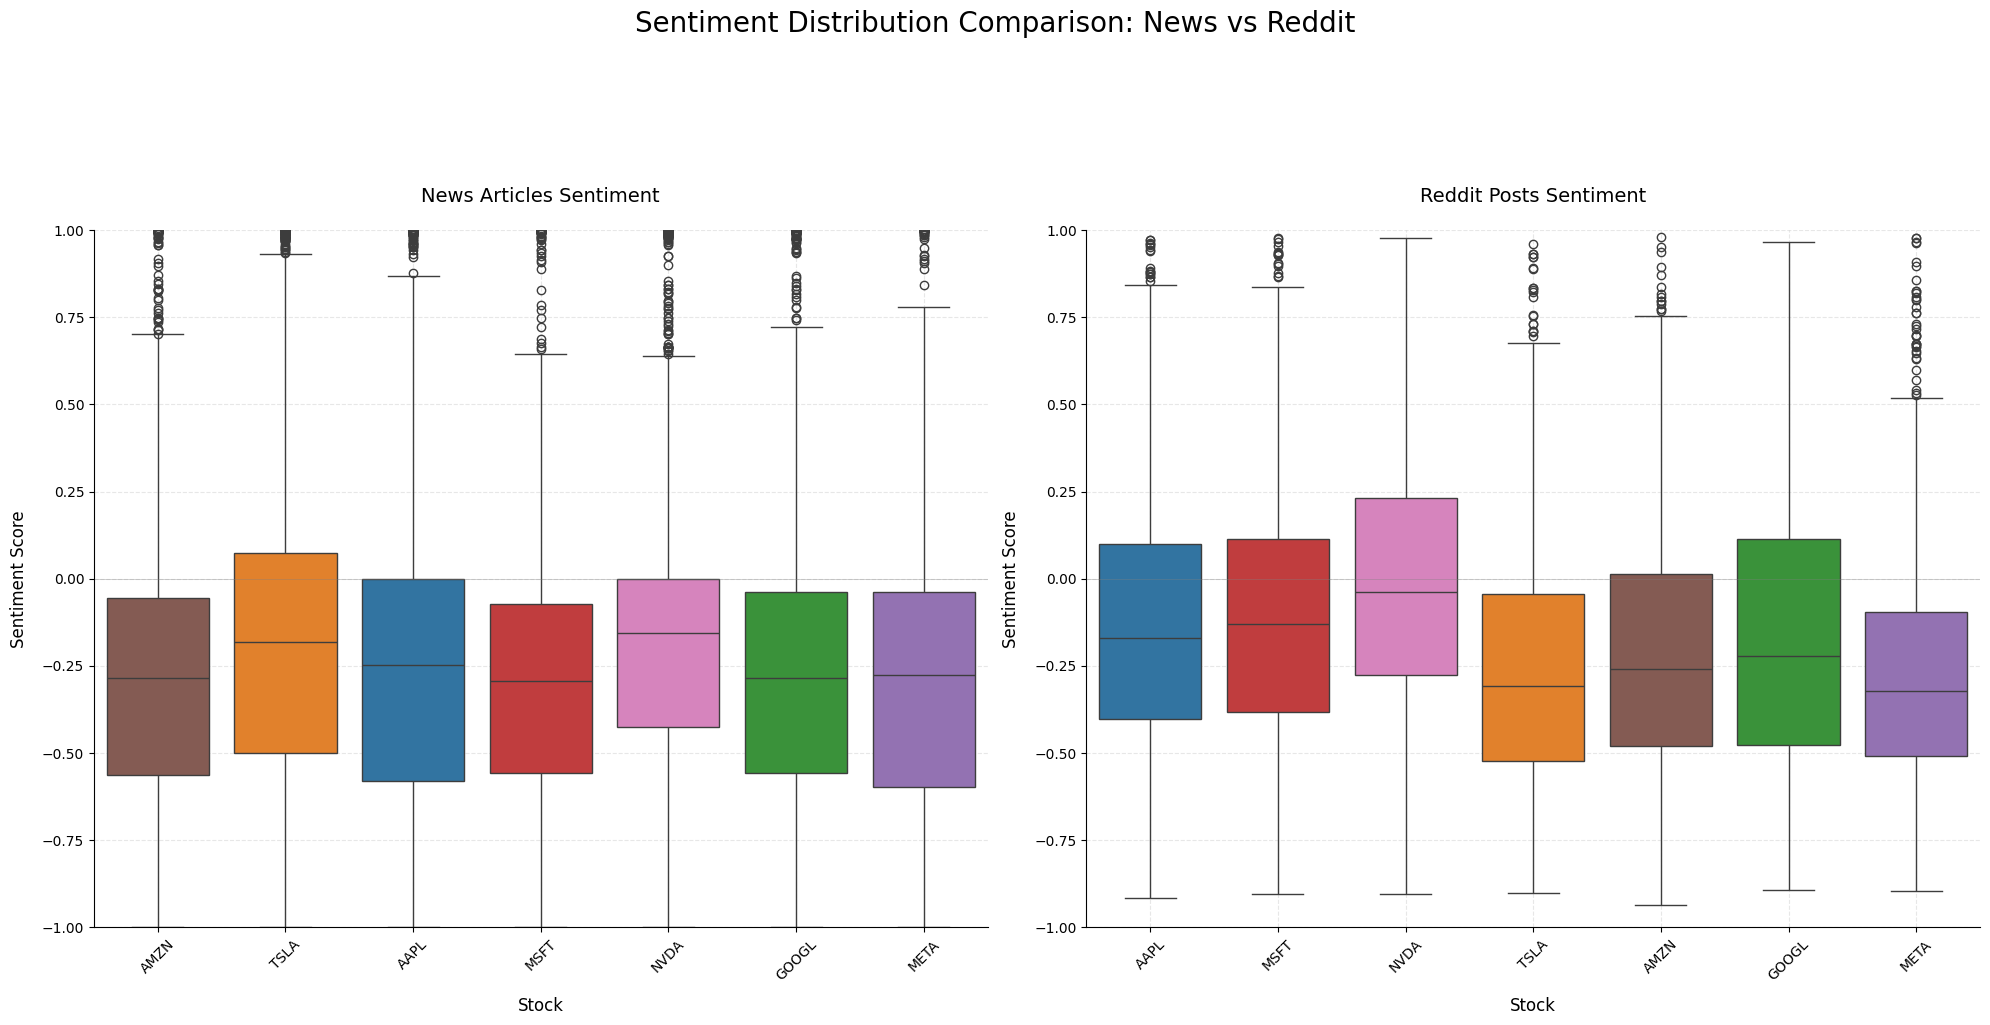

\begin{table}[h!]
\centering
\caption{Comparative Sentiment Statistics: News vs Reddit}
\label{tab:sentiment_stats}
\begin{tabular}{l|rrrr|rrrr}
\hline
& \multicolumn{4}{c|}{News Articles} & \multicolumn{4}{c}{Reddit Posts} \\
Stock & Count & Mean & Std & Median & Count & Mean & Std & Median \\
\hline
AAPL & 3,757 & -0.269 & 0.445 & -0.248 & 1,400 & -0.130 & 0.384 & -0.170 \\
TSLA & 5,538 & -0.186 & 0.468 & -0.181 & 1,265 & -0.267 & 0.353 & -0.308 \\
GOOGL & 4,763 & -0.302 & 0.406 & -0.286 & 897 & -0.165 & 0.398 & -0.220 \\
MSFT & 3,018 & -0.314 & 0.403 & -0.293 & 1,601 & -0.118 & 0.352 & -0.131 \\
META & 2,563 & -0.306 & 0.397 & -0.276 & 1,047 & -0.266 & 0.356 & -0.322 \\
AMZN & 4,632 & -0.313 & 0.410 & -0.284 & 1,104 & -0.215 & 0.362 & -0.260 \\
NVDA & 3,995 & -0.179 & 0.426 & -0.156 & 1,428 & -0.024 & 0.361 & -0.038 \\
\hline
Total/Avg & 28,266 & -0.267 & 0.422 & -0.246 & 8,742 & -0.169 & 0.367 & -0.207 \\
\hline
\end{tabular}
\end{table}



In [102]:
# Create figure with 1x2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Define consistent color palette
colors = {
    'AAPL': '#1f77b4',  # blue
    'TSLA': '#ff7f0e',  # orange  
    'GOOGL': '#2ca02c', # green
    'MSFT': '#d62728',  # red
    'META': '#9467bd',  # purple
    'AMZN': '#8c564b',  # brown
    'NVDA': '#e377c2'   # pink
}

# Create color palette for seaborn
palette = [colors[company] for company in companies]

# Clean news data
news_df['stock'] = news_df['stock'].str.strip("[]'").str.replace("'", "")
news_df_single_stock = news_df[news_df['stock'].isin(companies)]

# Plot 1: News Sentiment
sns.boxplot(data=news_df_single_stock, 
            x='stock', 
            y='sentiment_score',
            hue='stock',  # Add hue parameter
            palette=colors,
            legend=False,  # Hide legend since it's redundant
            ax=ax1)

# Plot 2: Reddit Sentiment
sns.boxplot(data=reddit_df,
            x='stock',
            y='sentiment_score',
            hue='stock',  # Add hue parameter
            palette=colors,
            legend=False,  # Hide legend since it's redundant
            ax=ax2)

# Style the plots
for ax, title in zip([ax1, ax2], ['News Articles Sentiment', 'Reddit Posts Sentiment']):
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel('Stock', fontsize=12, labelpad=10)
    ax.set_ylabel('Sentiment Score', fontsize=12, labelpad=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    
    # Set y-axis limits for consistency
    ax.set_ylim(-1.0, 1.0)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add overall title
fig.suptitle('Sentiment Distribution Comparison: News vs Reddit', fontsize=20, y=1.02)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.8)  # Make room for title

plt.savefig('Figures/boxplot_sentiment_comparison.jpg', dpi=300, bbox_inches='tight')
plt.show()
# Prepare the statistics
news_stats = news_df_single_stock.groupby('stock')['sentiment_score'].agg(['count', 'mean', 'std', 'median']).round(3)
reddit_stats = reddit_df.groupby('stock')['sentiment_score'].agg(['count', 'mean', 'std', 'median']).round(3)

# Create comparative LaTeX table
latex_table = (
    "\\begin{table}[h!]\n"
    "\\centering\n"
    "\\caption{Comparative Sentiment Statistics: News vs Reddit}\n"
    "\\label{tab:sentiment_stats}\n"
    "\\begin{tabular}{l|rrrr|rrrr}\n"
    "\\hline\n"
    "& \\multicolumn{4}{c|}{News Articles} & \\multicolumn{4}{c}{Reddit Posts} \\\\\n"
    "Stock & Count & Mean & Std & Median & Count & Mean & Std & Median \\\\\n"
    "\\hline\n"
)

# Combine stats for all companies
for company in companies:
    news_row = news_stats.loc[company] if company in news_stats.index else pd.Series({'count': 0, 'mean': 0, 'std': 0, 'median': 0})
    reddit_row = reddit_stats.loc[company] if company in reddit_stats.index else pd.Series({'count': 0, 'mean': 0, 'std': 0, 'median': 0})
    
    latex_table += (
        f"{company} & "
        f"{int(news_row['count']):,d} & {news_row['mean']:.3f} & {news_row['std']:.3f} & {news_row['median']:.3f} & "
        f"{int(reddit_row['count']):,d} & {reddit_row['mean']:.3f} & {reddit_row['std']:.3f} & {reddit_row['median']:.3f} \\\\\n"
    )

# Add totals row
news_totals = news_stats.agg({'count': 'sum', 'mean': 'mean', 'std': 'mean', 'median': 'mean'})
reddit_totals = reddit_stats.agg({'count': 'sum', 'mean': 'mean', 'std': 'mean', 'median': 'mean'})

latex_table += "\\hline\n"
latex_table += (
    f"Total/Avg & "
    f"{int(news_totals['count']):,d} & {news_totals['mean']:.3f} & {news_totals['std']:.3f} & {news_totals['median']:.3f} & "
    f"{int(reddit_totals['count']):,d} & {reddit_totals['mean']:.3f} & {reddit_totals['std']:.3f} & {reddit_totals['median']:.3f} \\\\\n"
)

latex_table += (
    "\\hline\n"
    "\\end{tabular}\n"
    "\\end{table}\n"
)

print(latex_table)

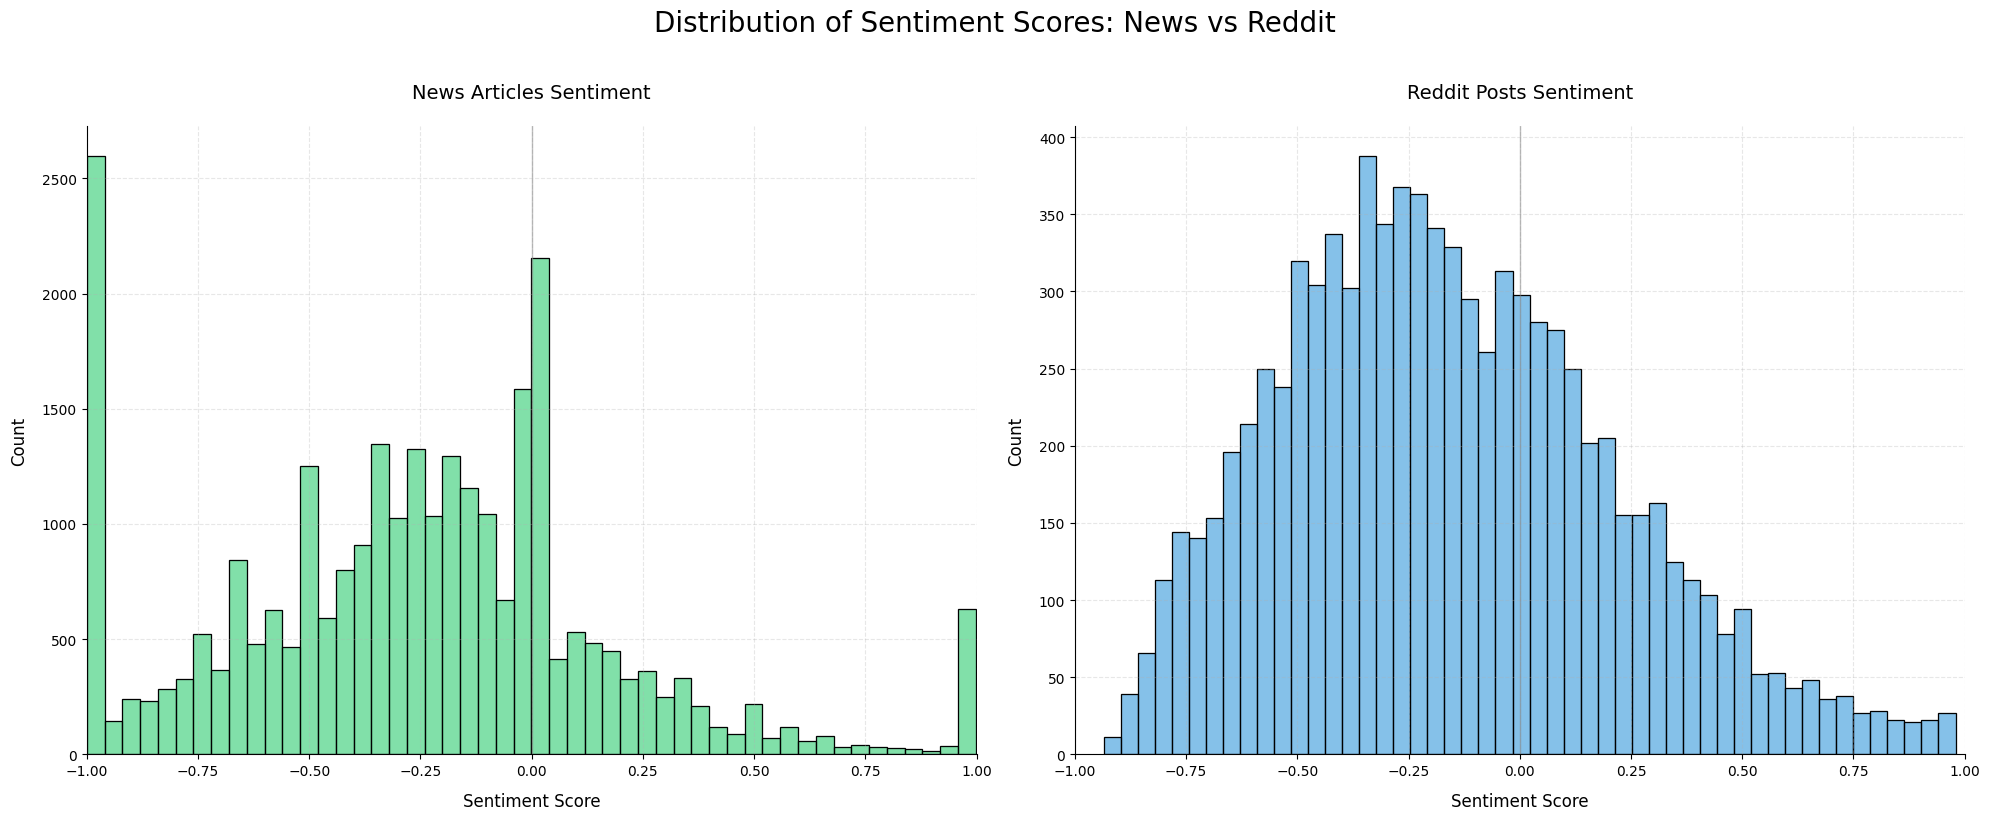


News Sentiment Score Summary Statistics:
count    28266.000
mean        -0.261
std          0.430
min         -1.000
25%         -0.526
50%         -0.250
75%         -0.001
max          0.998
Name: sentiment_score, dtype: float64

Reddit Sentiment Score Summary Statistics:
count    8742.000
mean       -0.161
std         0.374
min        -0.935
25%        -0.438
50%        -0.197
75%         0.083
max         0.979
Name: sentiment_score, dtype: float64

Skewness and Kurtosis:
News Skewness: 0.354
News Kurtosis: 0.475
Reddit Skewness: 0.465
Reddit Kurtosis: -0.133


In [104]:
# Create figure with 1x2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: News Sentiment Distribution
sns.histplot(data=news_df, 
            x='sentiment_score', 
            bins=50,
            color='#2ecc71',  # Green color
            alpha=0.6,
            ax=ax1)

# Plot 2: Reddit Sentiment Distribution
sns.histplot(data=reddit_df,
            x='sentiment_score',
            bins=50, 
            color='#3498db',  # Blue color
            alpha=0.6,
            ax=ax2)

# Style the plots
for ax, title in zip([ax1, ax2], ['News Articles Sentiment', 'Reddit Posts Sentiment']):
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel('Sentiment Score', fontsize=12, labelpad=10)
    ax.set_ylabel('Count', fontsize=12, labelpad=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set consistent x-axis limits
    ax.set_xlim(-1.0, 1.0)

# Add overall title
fig.suptitle('Distribution of Sentiment Scores: News vs Reddit', fontsize=20, y=1.02)
plt.subplots_adjust(top=0.8)  # Make room for title

# Adjust layout
plt.tight_layout()

plt.savefig('Figures/sentiment_distribution_news_vs_reddit.jpg', dpi=300, bbox_inches='tight')

plt.show()

# Print summary statistics
print("\nNews Sentiment Score Summary Statistics:")
print("=" * 80)
print(news_df['sentiment_score'].describe().round(3))

print("\nReddit Sentiment Score Summary Statistics:")
print("=" * 80)
print(reddit_df['sentiment_score'].describe().round(3))

# Additional statistics
print("\nSkewness and Kurtosis:")
print("=" * 80)
print(f"News Skewness: {news_df['sentiment_score'].skew():.3f}")
print(f"News Kurtosis: {news_df['sentiment_score'].kurtosis():.3f}")
print(f"Reddit Skewness: {reddit_df['sentiment_score'].skew():.3f}")
print(f"Reddit Kurtosis: {reddit_df['sentiment_score'].kurtosis():.3f}")

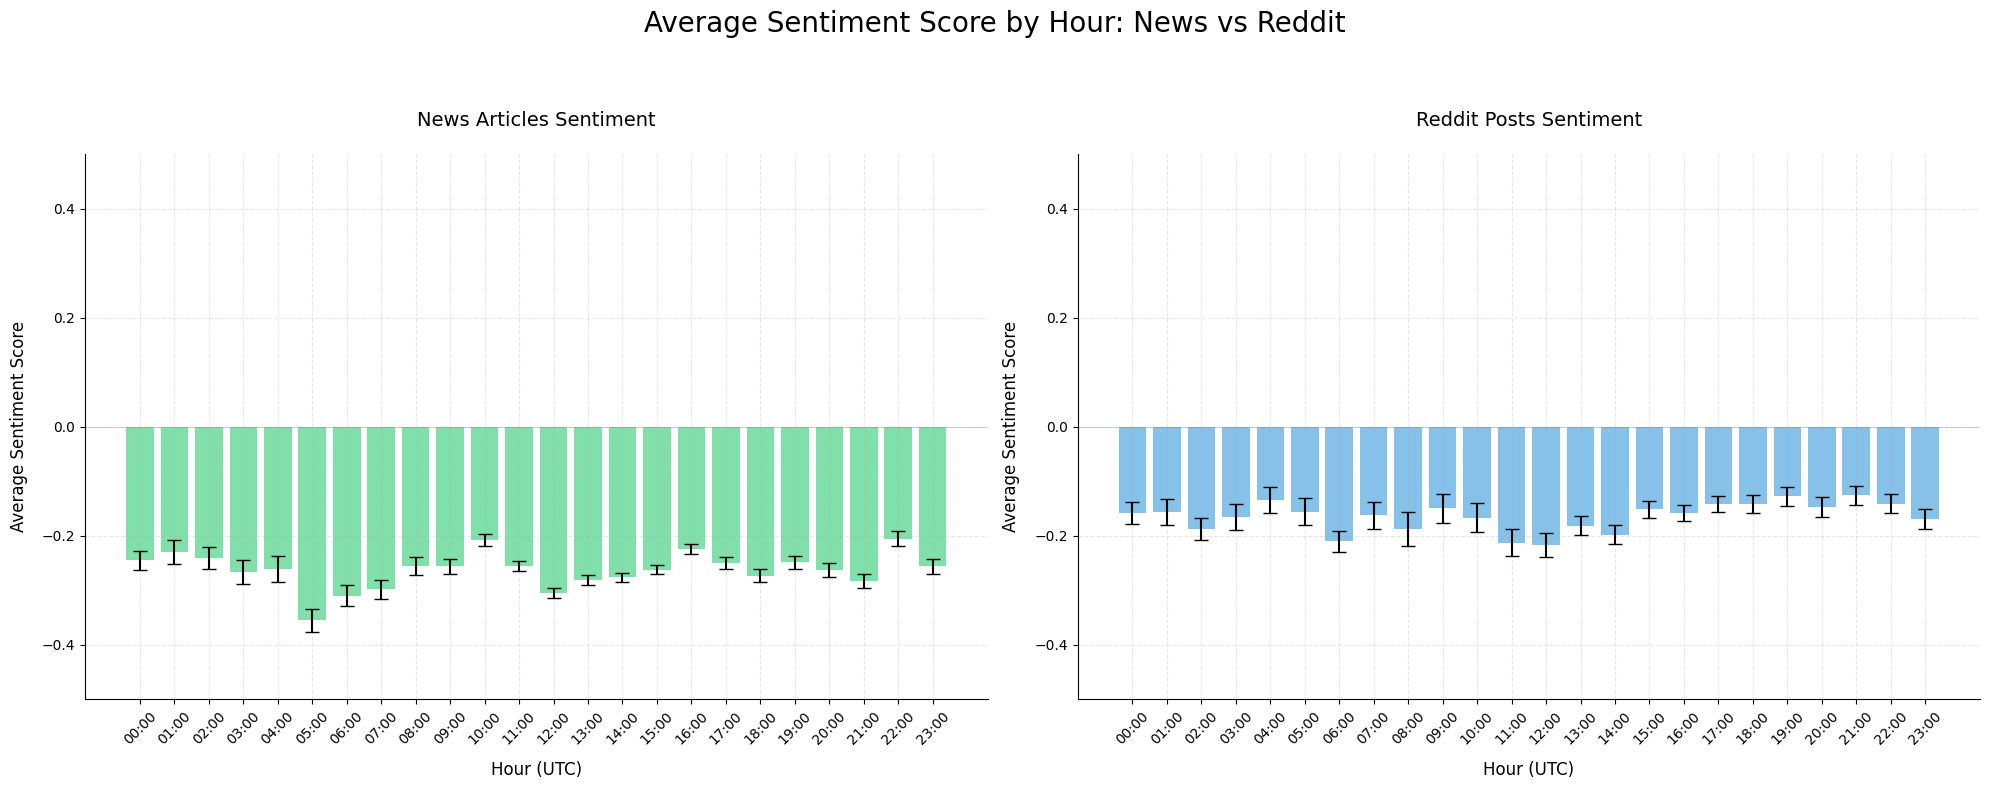

News Statistics Table:
\begin{table}[h!]
\centering
\caption{Hourly News Sentiment Statistics}
\label{tab:news_stats}
\begin{tabular}{lrrr}
\hline
Hour & Mean & Count & Std. Dev. \\
\hline
22:00 & -0.206 & 1287 & 0.510 \\
10:00 & -0.208 & 1254 & 0.415 \\
16:00 & -0.224 & 1995 & 0.428 \\
01:00 & -0.230 & 445 & 0.453 \\
02:00 & -0.241 & 452 & 0.428 \\
00:00 & -0.245 & 562 & 0.414 \\
19:00 & -0.248 & 1402 & 0.440 \\
17:00 & -0.250 & 1713 & 0.448 \\
11:00 & -0.255 & 1883 & 0.407 \\
08:00 & -0.256 & 687 & 0.438 \\
09:00 & -0.256 & 896 & 0.417 \\
23:00 & -0.256 & 1016 & 0.421 \\
04:00 & -0.261 & 382 & 0.472 \\
15:00 & -0.263 & 2277 & 0.394 \\
20:00 & -0.263 & 1228 & 0.426 \\
03:00 & -0.266 & 368 & 0.425 \\
18:00 & -0.273 & 1526 & 0.461 \\
14:00 & -0.277 & 2288 & 0.416 \\
13:00 & -0.281 & 2036 & 0.411 \\
21:00 & -0.283 & 1150 & 0.443 \\
07:00 & -0.298 & 601 & 0.438 \\
12:00 & -0.306 & 1836 & 0.402 \\
06:00 & -0.310 & 517 & 0.440 \\
05:00 & -0.355 & 465 & 0.449 \\
\hline
\end{tabular}
\end{tab

In [105]:
# Create figure with 1x2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Prepare news data
news_df['Hour'] = pd.to_datetime(news_df['timestamp']).dt.hour
news_hourly = news_df.groupby('Hour')['sentiment_score'].agg(['mean', 'count', 'std']).reset_index()

# Prepare Reddit data
reddit_df['Hour'] = pd.to_datetime(reddit_df['timestamp']).dt.hour
reddit_hourly = reddit_df.groupby('Hour')['sentiment_score'].agg(['mean', 'count', 'std']).reset_index()

# Plot 1: News Sentiment by Hour
ax1.bar(news_hourly['Hour'], 
        news_hourly['mean'],
        color='#2ecc71',
        alpha=0.6,
        yerr=news_hourly['std']/np.sqrt(news_hourly['count']),
        capsize=5)

# Plot 2: Reddit Sentiment by Hour
ax2.bar(reddit_hourly['Hour'],
        reddit_hourly['mean'],
        color='#3498db',
        alpha=0.6,
        yerr=reddit_hourly['std']/np.sqrt(reddit_hourly['count']),
        capsize=5)

# Style the plots
for ax, title in zip([ax1, ax2], ['News Articles Sentiment', 'Reddit Posts Sentiment']):
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel('Hour (UTC)', fontsize=12, labelpad=10)
    ax.set_ylabel('Average Sentiment Score', fontsize=12, labelpad=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    
    # Set x-axis ticks
    ax.set_xticks(range(24))
    ax.set_xticklabels([f'{i:02d}:00' for i in range(24)], rotation=45)
    
    # Set consistent y-axis limits
    ax.set_ylim(-0.5, 0.5)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add overall title
fig.suptitle('Average Sentiment Score by Hour: News vs Reddit', fontsize=20)

# Adjust layout with specific parameters
plt.tight_layout()
plt.subplots_adjust(top=0.8)  # Make room for title

# Save the figure
plt.savefig('Figures/hourly_sentiment_news_reddit.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics in LaTeX format
def create_latex_table(df, caption, label):
    latex_table = (
        f"\\begin{{table}}[h!]\n"
        f"\\centering\n"
        f"\\caption{{{caption}}}\n"
        f"\\label{{{label}}}\n"
        f"\\begin{{tabular}}{{lrrr}}\n"
        f"\\hline\n"
        f"Hour & Mean & Count & Std. Dev. \\\\\n"
        f"\\hline\n"
    )
    
    for _, row in df.iterrows():
        latex_table += f"{int(row['Hour']):02d}:00 & {row['mean']:.3f} & {int(row['count']):d} & {row['std']:.3f} \\\\\n"
    
    latex_table += (
        f"\\hline\n"
        f"\\end{{tabular}}\n"
        f"\\end{{table}}\n"
    )
    return latex_table

# Create LaTeX tables
news_latex = create_latex_table(
    news_hourly.sort_values('mean', ascending=False),
    "Hourly News Sentiment Statistics",
    "tab:news_stats"
)

reddit_latex = create_latex_table(
    reddit_hourly.sort_values('mean', ascending=False),
    "Hourly Reddit Sentiment Statistics",
    "tab:reddit_stats"
)

# Create peak hours table
peak_hours_latex = (
    "\\begin{table}[h!]\n"
    "\\centering\n"
    "\\caption{Peak Sentiment Hours}\n"
    "\\label{tab:peak_hours}\n"
    "\\begin{tabular}{lrr}\n"
    "\\hline\n"
    "Category & Hour & Score \\\\\n"
    "\\hline\n"
    f"News Most Positive & {news_hourly.loc[news_hourly['mean'].idxmax(), 'Hour']:02d}:00 & {news_hourly['mean'].max():.3f} \\\\\n"
    f"News Most Negative & {news_hourly.loc[news_hourly['mean'].idxmin(), 'Hour']:02d}:00 & {news_hourly['mean'].min():.3f} \\\\\n"
    f"Reddit Most Positive & {reddit_hourly.loc[reddit_hourly['mean'].idxmax(), 'Hour']:02d}:00 & {reddit_hourly['mean'].max():.3f} \\\\\n"
    f"Reddit Most Negative & {reddit_hourly.loc[reddit_hourly['mean'].idxmin(), 'Hour']:02d}:00 & {reddit_hourly['mean'].min():.3f} \\\\\n"
    "\\hline\n"
    "\\end{tabular}\n"
    "\\end{table}\n"
)

# Print the LaTeX tables
print("News Statistics Table:")
print("=" * 80)
print(news_latex)
print("\nReddit Statistics Table:")
print("=" * 80)
print(reddit_latex)
print("\nPeak Hours Table:")
print("=" * 80)
print(peak_hours_latex)